   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
K-Means Silhouette Score: 0.4085
K-Means Davies-Bouldin Index: 0.8890


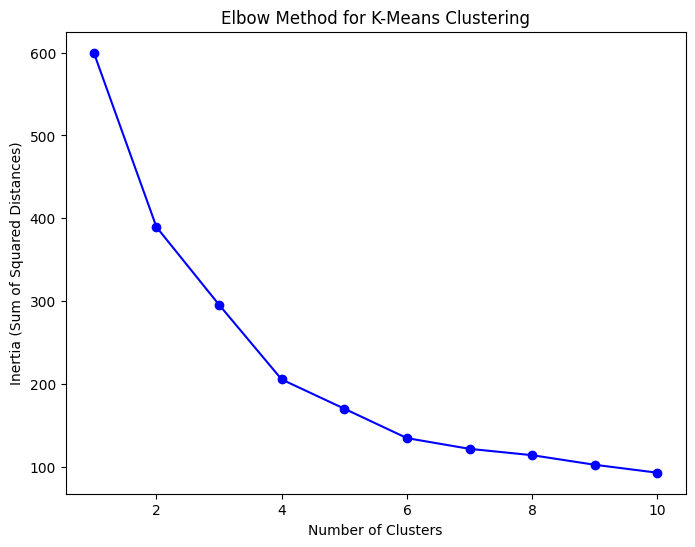

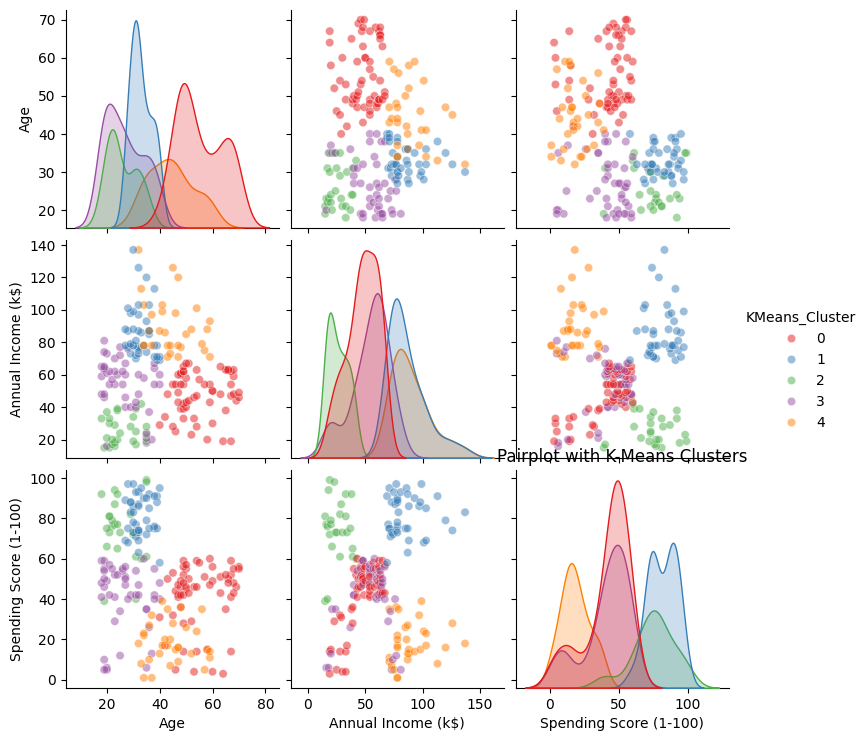

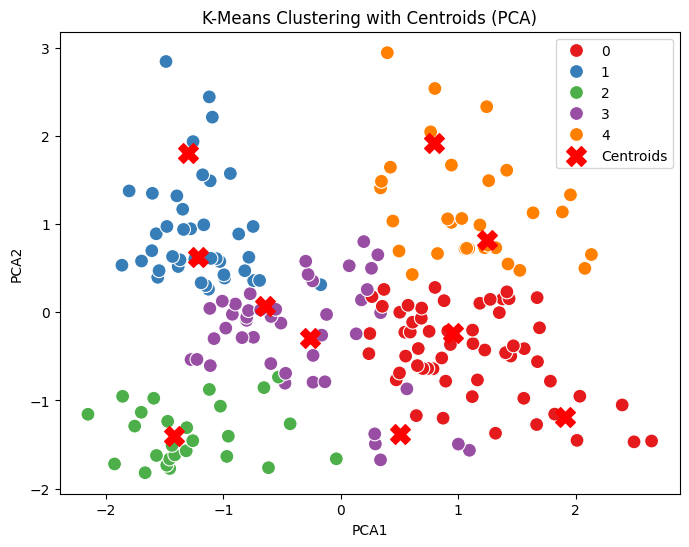

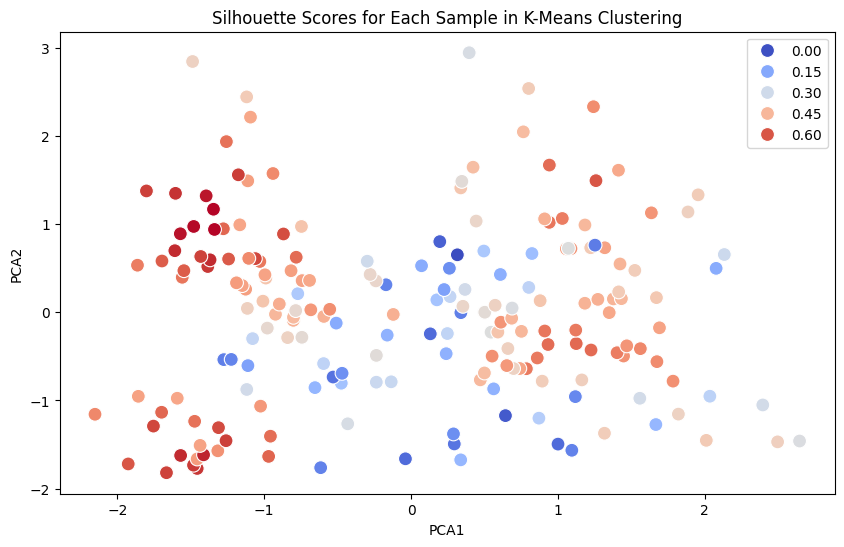

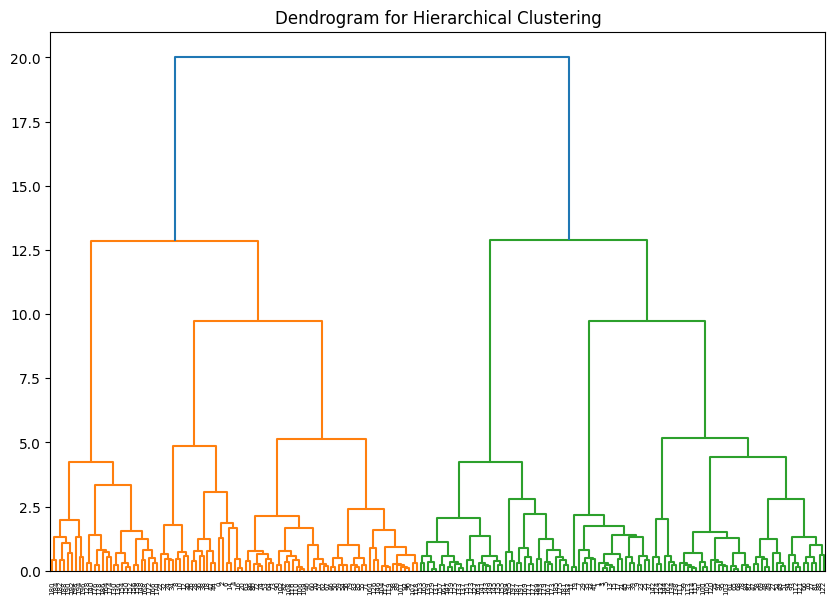

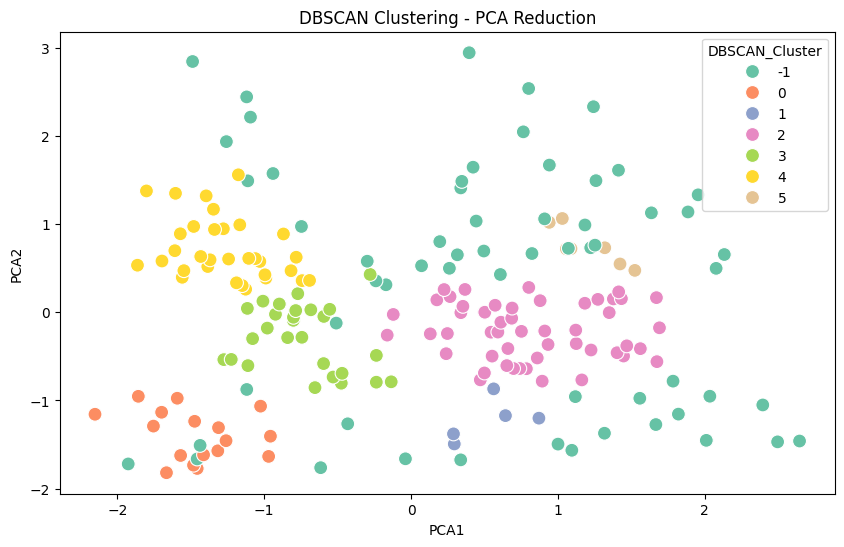

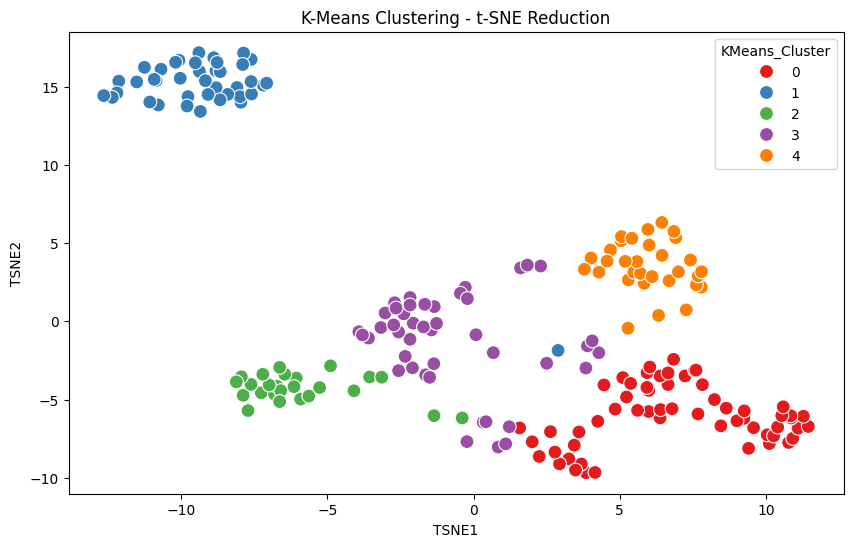

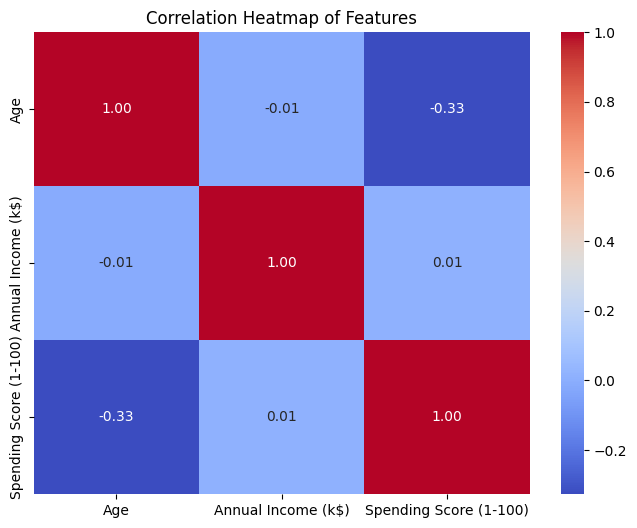

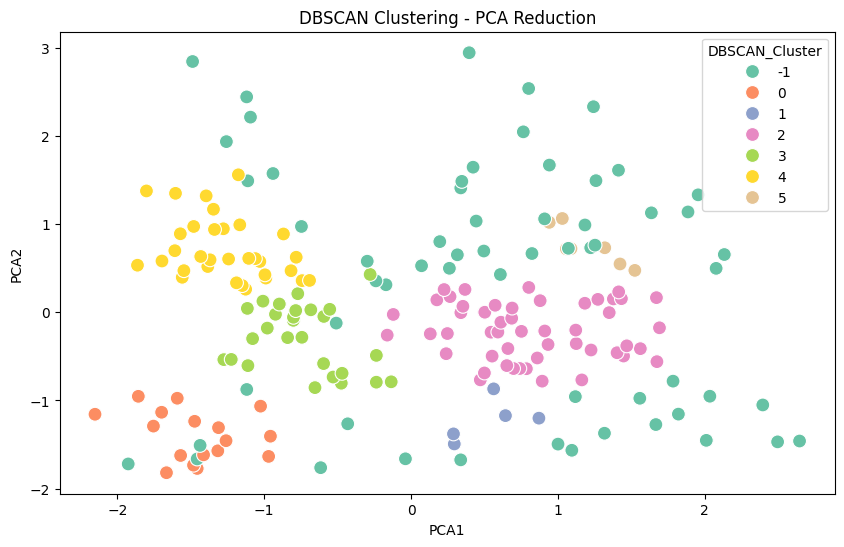

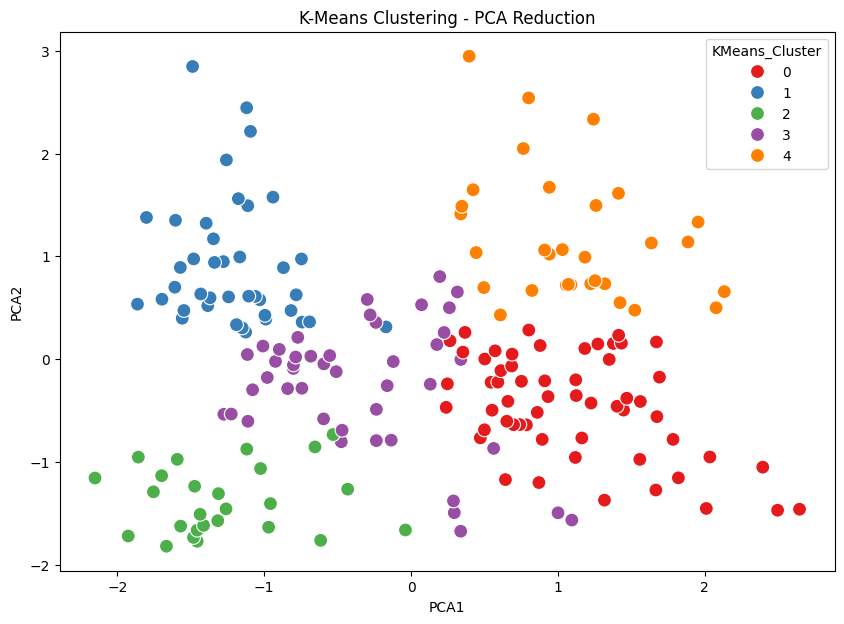

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')  # Adjust with your dataset path
print(df.head())

# Data Preprocessing
df = df.dropna()  # Handle missing values
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Select relevant features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate K-means with silhouette score and Davies-Bouldin index
silhouette = silhouette_score(scaled_features, df['KMeans_Cluster'])
db_index = davies_bouldin_score(scaled_features, df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {silhouette:.4f}")
print(f"K-Means Davies-Bouldin Index: {db_index:.4f}")

# Elbow Method for K-Means
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# Pairplot of Features with Cluster Labels
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'KMeans_Cluster']],
             hue='KMeans_Cluster', palette='Set1', plot_kws={'alpha': 0.5})
plt.title('Pairplot with K-Means Clusters')
plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot K-Means cluster centers (in PCA space)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set1', s=100)
centers = pca.transform(kmeans.cluster_centers_)  # Project centroids onto PCA space
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with Centroids (PCA)')
plt.legend()
plt.show()

# Silhouette Score Visualization
silhouette_vals = silhouette_samples(scaled_features, df['KMeans_Cluster'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=silhouette_vals, data=df, palette='coolwarm', s=100)
plt.title('Silhouette Scores for Each Sample in K-Means Clustering')
plt.show()

# Hierarchical Clustering
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clustering results using PCA for dimensionality reduction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='Set2', s=100)
plt.title('DBSCAN Clustering - PCA Reduction')
plt.show()

# t-SNE for further visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

# K-Means Clustering - t-SNE Reduction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Cluster', data=df, palette='Set1', s=100)
plt.title('K-Means Clustering - t-SNE Reduction')
plt.show()

# Heatmap of feature correlations
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Visualize DBSCAN and Hierarchical Clustering in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='Set2', s=100)
plt.title('DBSCAN Clustering - PCA Reduction')
plt.show()

# Visualize K-Means Clustering in 2D (for comparison)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set1', s=100)
plt.title('K-Means Clustering - PCA Reduction')
plt.show()
